<a href="https://colab.research.google.com/github/RenatoCoronado99/Machine-Learning/blob/main/ML_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import seaborn as sns

In [103]:
data = pd.read_csv('lung-cancer.data')
data.replace('?', np.nan, inplace=True)
#Verificamos cuáles columnas tienen Nan
data.isnull().sum()

data['f4'].fillna(data['f4'].mode()[0], inplace=True)
data['f38'].fillna(data['f4'].mode()[0], inplace=True)
print(data)

    target  f1  f2  f3 f4  f5  f6  f7  ...  f49  f50  f51  f52  f53  f54  f55  f56
0        1   0   3   0  1   0   2   2  ...    2    2    2    1    1    1    2    2
1        1   0   3   3  1   0   3   1  ...    2    2    2    2    2    1    2    2
2        1   0   3   3  2   0   3   3  ...    2    2    2    2    2    2    1    2
3        1   0   2   3  2   1   3   3  ...    2    2    2    2    2    2    2    2
4        1   0   3   2  1   1   3   3  ...    2    2    2    2    2    1    2    2
5        1   0   3   3  2   0   3   3  ...    2    2    2    2    2    2    1    2
6        1   0   3   2  1   0   3   3  ...    2    2    1    2    2    2    1    2
7        1   0   2   2  1   0   3   1  ...    1    2    2    2    2    1    2    2
8        1   0   3   1  1   0   3   1  ...    2    2    2    2    2    1    2    2
9        2   0   2   3  2   0   2   2  ...    2    1    3    2    1    1    2    2
10       2   0   2   2  0   0   3   2  ...    2    2    2    2    2    2    2    2
11  

In [104]:
def plot_corr(dataset):
  correlation=dataset.corr()
  plt.figure(figsize=(15,10))
  sns.heatmap(correlation,annot=True,cmap='coolwarm')
def funcion_lasso(X,y,dataset):
  lass = LassoCV()
  lass.fit(X,y)
  coeficientes = pd.Series(lass.coef_,index=X.columns)
  print(coeficientes)
  coefsort = coeficientes.sort_values()
  plt.rcParams['figure.figsize'] == (8.0,10.0)
  coefsort.plot(kind='barh')
  plt.title("features")

In [105]:
data1 = data

y = data['target']
X = data1.drop(['target'], axis="columns")

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)

score = log_reg.score(X_test, y_test)
print('Exactitud de data de entrenamiento: {:.3f}'.format(log_reg.score(X_train, y_train)))
print("Predicción train -> ", y_pred)
print("Score -> ", score)

Exactitud de data de entrenamiento: 1.000
Predicción train ->  [1 2 2 2 2 2 1 3]
Score ->  0.25


In [107]:
#Cross Validation
log_reg1 = LogisticRegression(max_iter = 500)
accuracies = cross_val_score(log_reg1, X, y, cv=10)
print("Precisión Cross validation : %0.2f (+/- % 0.2f)" % (accuracies.mean(),accuracies.std()*2))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Precisión Cross validation : 0.41 (+/-  0.51)


In [114]:
#Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2 2 0]
 [1 2 0]
 [0 0 1]]


f1    -0.000000
f2    -0.226072
f3     0.000000
f4     0.000000
f5     0.000000
f6    -0.077436
f7     0.000000
f8    -0.000000
f9    -0.000000
f10   -0.154343
f11    0.000000
f12   -0.000000
f13   -0.008085
f14   -0.038358
f15   -0.000000
f16    0.000000
f17   -0.000000
f18    0.000000
f19    0.246131
f20    0.244208
f21   -0.000000
f22   -0.000000
f23   -0.085816
f24   -0.000000
f25    0.000000
f26   -0.000000
f27   -0.004429
f28   -0.000000
f29   -0.000000
f30    0.000000
f31   -0.000000
f32   -0.000000
f33   -0.053921
f34   -0.082765
f35    0.000000
f36    0.000000
f37    0.081279
f38    0.000000
f39   -0.000000
f40   -0.000000
f41   -0.000000
f42    0.000000
f43    0.000000
f44   -0.000000
f45    0.000000
f46    0.000000
f47    0.000000
f48    0.000000
f49    0.000000
f50    0.000000
f51    0.000000
f52    0.000000
f53    0.000000
f54    0.000000
f55   -0.000000
f56   -0.000000
dtype: float64


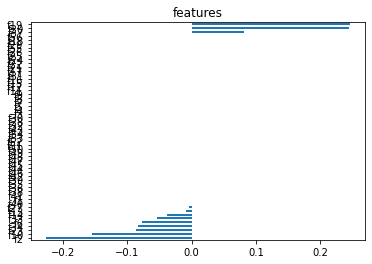

In [109]:
funcion_lasso(X, y, X)

In [113]:
listDrop = ['target','f1', 'f3', 'f4', 'f5', 'f7', 'f8', 'f9', 'f11', 'f12', 'f15', 'f16', 'f17', 'f18', 'f21', 'f22', 'f24', 'f25', 'f26', 'f28', 'f29', 'f30', 'f31', 'f32', 'f35', 'f36','f38','f39','f40','f41','f42','f43','f44','f45','f46','f47','f48','f49','f50','f51','f52','f53','f54','f55','f56']
data1 = data

y = data['target']
X = data1.drop(listDrop, axis="columns")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)

score = log_reg.score(X_test, y_test)
print('Exactitud de data de entrenamiento: {:.3f}'.format(log_reg.score(X_train, y_train)))
print("Predicción train -> ", y_pred)
print("Score -> ", score)



#Cross Validation
log_reg1 = LogisticRegression(max_iter = 500)
accuracies = cross_val_score(log_reg1, X, y, cv=10)
print("Precisión Cross validation : %0.2f (+/- % 0.2f)" % (accuracies.mean(),accuracies.std()*2))



Exactitud de data de entrenamiento: 0.958
Predicción train ->  [2 2 1 1 2 1 2 3]
Score ->  0.625


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Precisión Cross validation : 0.63 (+/-  0.65)


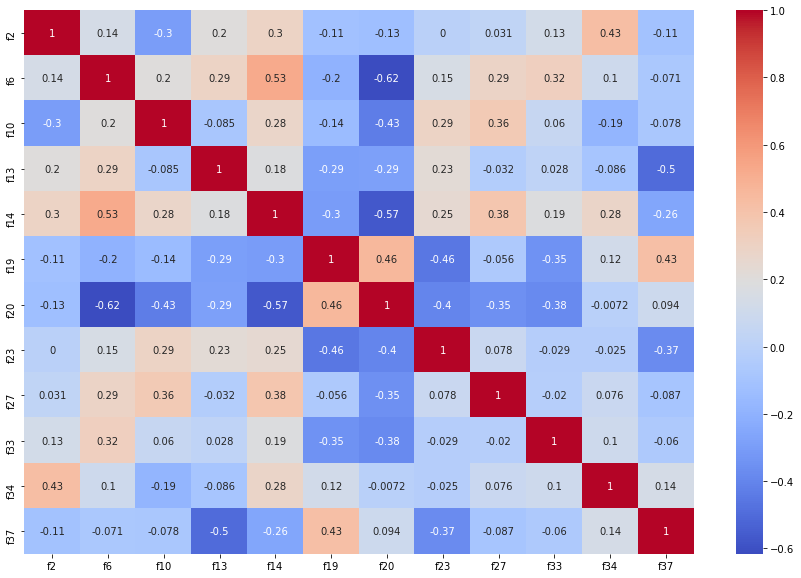

In [111]:
plot_corr(X)